<a href="https://colab.research.google.com/github/victorjms/prediccion-ventas/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [246]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [247]:
import seaborn as sns

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
filename = '/content/drive/My Drive/Coding_Dojo/Semana_02/sales_predictions.csv' # colocamos la ruta del archivo a importar
df = pd.read_csv(filename) # colocamos el contenido del archivo en "df"
df # imprimimos "df"

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [249]:
tipo_item = df.groupby(["Item_Type"])[["Item_Outlet_Sales"]].mean()
tipo_item.head()
tipo_item.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, Baking Goods to Starchy Foods
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item_Outlet_Sales  16 non-null     float64
dtypes: float64(1)
memory usage: 256.0+ bytes


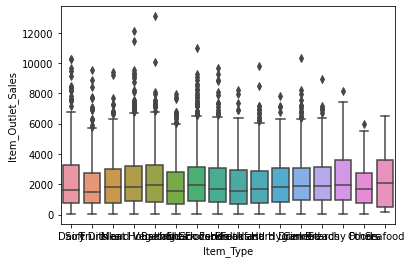

In [250]:
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)

In [251]:
tipo_item

,Item_Outlet_Sales
Item_Type,
Baking Goods,1952.971207
Breads,2204.132226
Breakfast,2111.808651
Canned,2225.194904
Dairy,2232.542597
Frozen Foods,2132.867744
Fruits and Vegetables,2289.009592
Hard Drinks,2139.221622
Health and Hygiene,2010.000265


In [252]:
# Observamos la información general de nuestros datos, se pueden ver datos faltantes en la columna 1 y 8.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [253]:
df[df.Outlet_Size.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [254]:
df[df.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [255]:
# De esta manera podemos ver las filas y columnas que tiene nuestra tabla.
df.shape

(8523, 12)

In [256]:
# De esta manera podemos saber las filas y columnas de la tabla si los valores faltantes de estas dos columnas coinciden en una misma fila.
# Se puede ver que ningun valor faltante coincide en estas columnas en una misma fila
df.dropna(subset=["Item_Weight", "Outlet_Size"], how="all").shape

(8523, 12)

In [257]:
# Estas órdenes son momentaneas, en este caso nos deja ver cuantas filas y columnas nos quedarían si eliminamos las filas con valores faltantes.
# Si elejimos trabajar solamente con los datos completos, estariamos dejando de lado el 45,44% de los datos
df.dropna(subset=["Item_Weight", "Outlet_Size"], how="any").shape

(4650, 12)

In [258]:
# Podemos observar el número valores presentes en la columna seleccionada.
df['Item_Weight'].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

In [259]:
# Podemos observar el número valores presentes en la columna seleccionada. El tamaño medio de las tiendas es mayor sin embargo las tiendas pequeñas también son numerosas
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [260]:
# Me gustaría ver alguna relación entre el tamaño de la tienda y el tipo de tienda, pero no lo veo claro.
# Pero creo que podría ser una opción puede ser agrupar las columnas y ver la mayor coincidencia.
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [261]:
# es función nos permite generar un vistazo de los valores 
# estadisticos de tipo descriptivo de cada columna, no toma en cuneta a las columnas con valores faltantes.
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


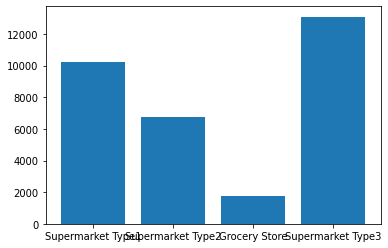

In [262]:
# Se crea la figura y los ejes con plt.subplots
fig, ax = plt.subplots()
# Grafico de la relación entre el tipo de tiendas y las ventas 
ax.bar(df['Outlet_Type'], df['Item_Outlet_Sales'])


# Graficamos la imagen final
plt.show()


In [263]:
df_media_item = df["Item_Weight"].fillna(value=12.6, inplace=True)

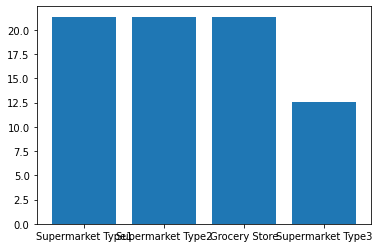

In [264]:
# Se crea la figura y los ejes con plt.subplots
fig, ax = plt.subplots()
# Grafico de la relación entre el tipo de tiendas y las ventas 
ax.bar(df['Outlet_Type'], df['Item_Weight'])


# Graficamos la imagen final
plt.show()

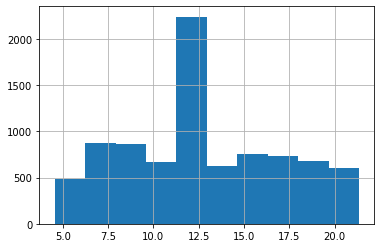

In [265]:
df['Item_Weight'].hist()

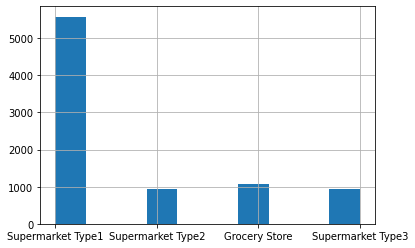

In [266]:
df['Outlet_Type'].hist()

In [267]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [268]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [269]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [270]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [272]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014168,0.024951,0.007739,0.009693
Item_Visibility,-0.014168,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024951,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.007739,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.009693,-0.128625,0.567574,-0.049135,1.000000


In [273]:
df.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


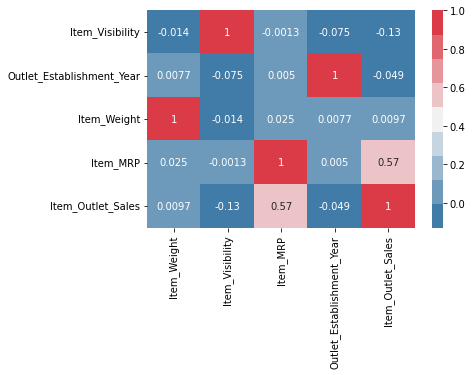

In [275]:
# Un mapa de calor puede facilitar (en teoría) la lectura de la matriz de correlación
sns.heatmap(df.corr().sort_values(by = ['Item_Outlet_Sales']), annot=True, cmap = sns.diverging_palette(240, 10, n=9))

# Ejercicio KNN

# Definir el dataset para el algoritmo KNN, transformando valores categoricos.
## Me parece al ver el mapa de calor que el precio de mayorista tiene una correlación alta, sin embargo las columnas con valorescategóricos no nos permiten ver las correlaciones existentes,por lo tanto se puede transformar estos valores para ver su relación y después entrenar al algoritmo.

In [276]:
# Coloco las variables que me interesan para mi modelo
categoria_prod = df['Item_Type']
locacion_tienda = df['Outlet_Location_Type']
tipo_tienda = df['Outlet_Type']
ventas = df['Item_Outlet_Sales'].astype(int)
mrp = df['Item_MRP'].astype(int)
ventas_array= np.array(ventas)

In [277]:
ventas_array

array([3735,  443, 2097, ..., 1193, 1845,  765])

In [278]:
# Importar LabelEncoder
from sklearn import preprocessing
#creación labelEncoder
le = preprocessing.LabelEncoder()
# convertir nombres en números.
categoria_prod_codificado=le.fit_transform(categoria_prod)
print(categoria_prod_codificado)

[ 4 14 10 ...  8 13 14]


In [279]:
categoria_prod_codificado.shape

(8523,)

In [280]:
# conversion de nombres a números
locacion_tienda_codificado=le.fit_transform(locacion_tienda)
print(locacion_tienda_codificado)

[0 2 0 ... 1 2 0]


In [281]:
locacion_tienda_codificado.shape

(8523,)

In [282]:
tipo_tienda_codificado=le.fit_transform(tipo_tienda)
print(tipo_tienda_codificado)

[1 2 1 ... 1 2 1]


In [283]:
tipo_tienda_codificado

array([1, 2, 1, ..., 1, 2, 1])

In [296]:
# Una vez convertidos los valores categóricos a numéricos estos se combinan en una sola matriz
caracteristicas=list(zip(categoria_prod_codificado,locacion_tienda_codificado,tipo_tienda_codificado))
car_array = np.array(caracteristicas)
car_array.shape

(8523, 3)

In [327]:
# Importar la función train_test_split
from sklearn.model_selection import train_test_split

# Separar el dataset en set de entrenamiento y set de prueba
X_train, X_test, y_train, y_test = train_test_split(car_array, ventas_array, test_size=0.3) # 70% entrenamiento y 30% prueba

In [340]:
#Importar modelo clasificador KNN
from sklearn.neighbors import KNeighborsClassifier

#Crear clasificador KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo usando los sets de entrenamiento
knn.fit(X_train, y_train)

# Predecir la respuesta para el dataset de prueba
y_pred = knn.predict(X_test)

In [341]:
#Importar scikit-learn metrics para calcular la exactitud
from sklearn import metrics
# Exactitud del modelo, que tan frecuente es correcto el clasificador
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0011732499022291747


In [344]:
#Importar modelo clasificador KNN
from sklearn.neighbors import KNeighborsClassifier

#Crear clasificador KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo usando los sets de entrenamiento
knn.fit(X_train, y_train)

# Predecir la respuesta para el dataset de prueba
y_pred = knn.predict(X_test)

In [345]:
#Importar scikit-learn metrics para calcular la exactitud
from sklearn import metrics
# Exactitud del modelo, que tan frecuente es correcto el clasificador
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0007821666014861165
